In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [152]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
data = pd.read_csv('/content/drive/My Drive/CryptoCurrency_project/BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2021-09-20,47261.406250,47328.199219,42598.914063,42843.800781,42843.800781,4.390985e+10
1823,2021-09-21,43012.234375,43607.609375,39787.609375,40693.675781,40693.675781,4.870109e+10
1824,2021-09-22,40677.953125,43978.621094,40625.632813,43574.507813,43574.507813,3.813971e+10
1825,2021-09-23,43560.296875,44942.175781,43109.339844,44895.097656,44895.097656,3.424406e+10
1826,2021-09-24,44858.941406,44951.949219,43996.035156,44225.003906,44225.003906,3.329657e+10


In [154]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1.823000e+03
mean,12562.440455,12919.055186,12171.932037,12585.280719,12585.280719,1.899253e+10
std,14328.866958,14761.705859,13824.860353,14344.321311,14344.321311,2.122287e+10
min,600.807007,603.380981,599.710999,600.825989,600.825989,3.397780e+07
25%,4079.807740,4165.619629,3995.687622,4082.832642,4082.832642,3.717140e+09
50%,7991.885254,8197.788086,7788.373535,7988.560547,7988.560547,1.316083e+10
75%,11251.101562,11528.194824,10928.497558,11277.880860,11277.880860,2.881743e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [155]:
data_training = data[data['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-24,602.960999,604.580017,602.044983,602.625000,602.625000,3.535950e+07
1,2016-09-25,602.749023,603.380981,599.710999,600.825989,600.825989,3.397780e+07
2,2016-09-26,600.807007,608.143005,600.348999,608.043030,608.043030,5.915380e+07
3,2016-09-27,608.021973,608.247986,604.109985,606.166016,606.166016,4.942240e+07
4,2016-09-28,606.242981,606.590027,604.606995,604.728027,604.728027,4.872260e+07
...,...,...,...,...,...,...,...
1189,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1190,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1191,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1192,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


In [156]:
data_test = data[data['Date']< '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-24,602.960999,604.580017,602.044983,602.625000,602.625000,3.535950e+07
1,2016-09-25,602.749023,603.380981,599.710999,600.825989,600.825989,3.397780e+07
2,2016-09-26,600.807007,608.143005,600.348999,608.043030,608.043030,5.915380e+07
3,2016-09-27,608.021973,608.247986,604.109985,606.166016,606.166016,4.942240e+07
4,2016-09-28,606.242981,606.590027,604.606995,604.728027,604.728027,4.872260e+07
...,...,...,...,...,...,...,...
1189,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1190,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1191,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1192,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


In [157]:
 training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
 training_data.head()

,Open,High,Low,Close,Volume
0,602.960999,604.580017,602.044983,602.625000,35359500.0
1,602.749023,603.380981,599.710999,600.825989,33977800.0
2,600.807007,608.143005,600.348999,608.043030,59153800.0
3,608.021973,608.247986,604.109985,606.166016,49422400.0
4,606.242981,606.590027,604.606995,604.728027,48722600.0


In [158]:
#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.14118819e-04, 6.15344064e-05, 1.27023764e-04, 9.52030226e-05,
        3.06555622e-05],
       [1.02888299e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.44386591e-04, 3.47222437e-05, 3.81923244e-04,
        5.58575982e-04],
       ...,
       [3.55859214e-01, 3.54649614e-01, 3.63557905e-01, 3.61008652e-01,
        4.97235568e-01],
       [3.61296328e-01, 3.51615375e-01, 3.63364314e-01, 3.54147211e-01,
        5.06750928e-01],
       [3.54629625e-01, 3.45480893e-01, 3.57566555e-01, 3.48887211e-01,
        4.68896056e-01]])

In [159]:
X_train = [] 
Y_train = []

In [160]:
training_data.shape[0]

1194

In [161]:
for i in range(60, training_data.shape[0]):
   X_train.append(training_data[i-60:i])
   Y_train.append(training_data[i,0])

In [162]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape


(1134, 60, 5)

In [163]:
from tensorflow.keras import Sequential

In [164]:
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [165]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))


In [166]:
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 120)              

In [167]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [168]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
21/21 [==============================] - 10s 256ms/step - loss: 0.0432 - val_loss: 0.0037
Epoch 2/20
21/21 [==============================] - 5s 222ms/step - loss: 0.0115 - val_loss: 0.0016
Epoch 3/20
21/21 [==============================] - 5s 226ms/step - loss: 0.0089 - val_loss: 0.0016
Epoch 4/20
21/21 [==============================] - 5s 225ms/step - loss: 0.0082 - val_loss: 0.0017
Epoch 5/20
21/21 [==============================] - 5s 227ms/step - loss: 0.0070 - val_loss: 0.0041
Epoch 6/20
21/21 [==============================] - 5s 223ms/step - loss: 0.0070 - val_loss: 0.0033
Epoch 7/20
21/21 [==============================] - 5s 222ms/step - loss: 0.0061 - val_loss: 0.0024
Epoch 8/20
21/21 [==============================] - 5s 225ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 9/20
21/21 [==============================] - 5s 224ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 10/20
21/21 [==============================] - 5s 224ms/step - loss: 0.0057 - val_loss: 0.001

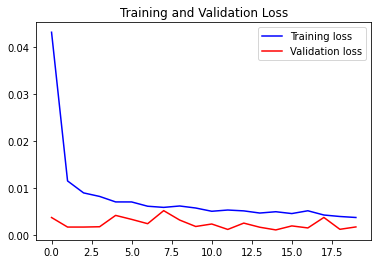

In [169]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [170]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,2.124268e+10
1,9324.787109,9379.806641,9141.251953,9235.354492,2.113222e+10
2,9235.607422,9505.051758,9191.485352,9412.612305,2.617026e+10
3,9413.004883,9457.417969,9256.931641,9342.527344,2.619861e+10
4,9340.864258,9423.237305,9305.909180,9360.879883,2.313390e+10


In [171]:
inputs = scaler.transform(df) 
inputs

array([[0.45875386, 0.4502862 , 0.47075726, 0.46166525, 0.47055408],
       [0.46219777, 0.45040528, 0.46486123, 0.45693618, 0.46810342],
       [0.45747302, 0.45683285, 0.46759511, 0.4663166 , 0.57988152],
       ...,
       [0.35585921, 0.35464961, 0.36355791, 0.36100865, 0.49723557],
       [0.36129633, 0.35161537, 0.36336431, 0.35414721, 0.50675093],
       [0.35462962, 0.34548089, 0.35756655, 0.34888721, 0.46889606]])

In [172]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,2.124268e+10
1,9324.787109,9379.806641,9141.251953,9235.354492,2.113222e+10
2,9235.607422,9505.051758,9191.485352,9412.612305,2.617026e+10
3,9413.004883,9457.417969,9256.931641,9342.527344,2.619861e+10
4,9340.864258,9423.237305,9305.909180,9360.879883,2.313390e+10


In [180]:
inputs = scaler.transform(df)

In [181]:
X_test =[]
Y_test = []
X_test=np.array(X_test)
Y_test=np.array(Y_test)


In [230]:
for i in range (60, inputs.shape[0]):
  X_test=np.append(X_test,inputs[i-60:i])
  Y_test=np.append(Y_test,inputs[i, 0])
  X_test=np.reshape(X_test, X_test.shape + (1,))
scaler.scale_


array([5.29801499e-05, 5.13198990e-05, 5.44235795e-05, 5.29196445e-05,
       2.21868439e-11])